## 3.8 Multi Variable Regression

### Multi-Variable Linear Regression
* 입력 변수가 1개가 아닌 여러개인 경우 다변수 선형회귀
    * bias 도 입력 변수가 1인 것으로 생각할 수 있다
    * $y = W_0X_0 + W_1X_1 + W_2X_2$
        * $W_0$ : 상수, bias
        * $X_0$ : 1
        * $W_n$ : n번째 계수
        * $X_n$ : n번째 입력 변수
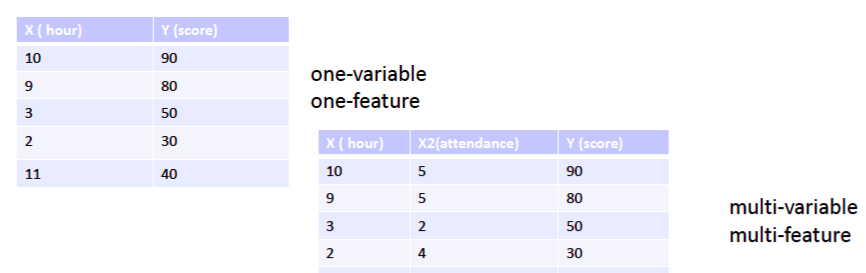

### 행렬곱
* 각각의 입력 변수에 대해서 미분을 하기 불편하므로 행렬 연산을 한다.
* 행렬곱 연산은 각각의 계수를 개별적으로 찾는 것을 쉽게 해준다.
* 이 때 전치행렬(Transpose)가 쓸모 있다.
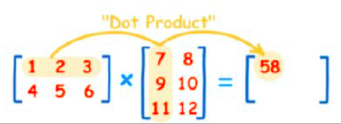

### 행렬곱을 이용한 연산
* $H(X) = WX + b$
* $\begin{bmatrix} w1 & w2 & w3 \end{bmatrix} \times \begin{bmatrix} x1 \\ x2 \\x3\end{bmatrix} = 
\begin{bmatrix} w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}$

### bias 제거 단순화
* $H(X) = WX$
*  $\begin{bmatrix} b & w1 & w2 & w3 \end{bmatrix} \times \begin{bmatrix} 1\\ x1 \\ x2 \\x3\end{bmatrix} = 
\begin{bmatrix}b \times 1 +  w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}$

### 전치 행렬
* Transpose
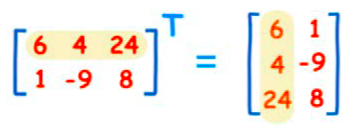

### 전치행렬을 이용한 연산
* $W = \begin{bmatrix} b\\w1\\w2\\w3\end{bmatrix}, x = \begin{bmatrix} 1 \\x1\\x2\\x3\end{bmatrix}$ 일때
* $H(X) = W^TX$
* $ =  \begin{bmatrix}b & w1 & w2 & w3\end{bmatrix} 
 \times \begin{bmatrix} 1 \\ x1 \\ x2 \\ x3 \end{bmatrix} = 
\begin{bmatrix}b \times1 + w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}
$


### 2과목 점수 계산 예제
* 2과목의 시험 점수로 학점을 계산하는 예제를 만들어 보자.
    * 3개의 변수를 사용한다.
        * $x_0$ = 1, bias, 50점 기본점수
        * $x_1$ = 0~50, 가중치 0.7
        * $x_2$ = 0~50, 가중치 0.3
        * $y = 50x_0 + 0.7x_1 + 0.3x_2$

(50,)
(50, 1)


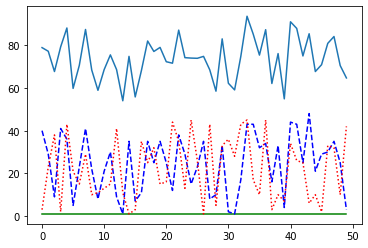

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

m = 50
X = np.ones((m,3), dtype=np.float32)
X[:, 1] = np.random.randint(0, 50, (m))
X[:, 2] = np.random.randint(0, 50, (m))
y = X.T[0] * 50 + X.T[1] * 0.7 + X.T[2] * 0.3
print(y.shape)
y = y.reshape(50,-1)
print(y.shape)
plt.plot(np.arange(m), X.T[0], 'g-')
plt.plot(np.arange(m), X.T[1], 'b--')
plt.plot(np.arange(m), X.T[2], 'r:')
plt.plot(np.arange(m), y)

In [2]:
W = np.random.rand(3,1)
print('initial W', W.ravel())

learning_rate = 0.0005
epochs = 50000
for epoch in range(epochs):
    hypothesis = X.dot(W)
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient = 2/m * X.T.dot(loss)
    W = W - learning_rate * gradient
    if epoch %5000 == 0:
        print('epoch:',epoch,' cost:',cost)
print('Final W:',W.ravel(), 'cost:%f'%cost, 'gradient:', gradient.ravel())



initial W [0.91127651 0.43782542 0.84876985]
epoch: 0  cost: 2002.8254873661695
epoch: 5000  cost: 80.66595673103829
epoch: 10000  cost: 18.037717749496604
epoch: 15000  cost: 4.033414773666358
epoch: 20000  cost: 0.9019120357937149
epoch: 25000  cost: 0.20167658571611108
epoch: 30000  cost: 0.04509690925107318
epoch: 35000  cost: 0.010084121653474994
epoch: 40000  cost: 0.002254910845063723
epoch: 45000  cost: 0.000504220709024271
Final W: [49.97257097  0.7005291   0.30039016] cost:0.000113 gradient: [-0.00821759  0.00015851  0.00011689]


## sciki-learn 구현

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
W = lr.coef_
b = lr.intercept_
print('W:', W, 'b:', b)


W: [[0.         0.70000005 0.30000004]] b: [49.999992]
